In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

df = pd.read_csv('pandaspractice.csv.csv')
df

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entire home/apt,False,False,6,False,0,1,10,100,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2,False,0,0,8,86,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,Vienna,637.168969,Weekend,Entire home/apt,False,False,2,False,0,0,10,93,1,0.994051,0.202539,169.073402,12.107921,282.296425,6.822996
41712,Vienna,301.054157,Weekend,Private room,False,True,2,False,0,0,10,87,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


In [2]:
df = pd.read_csv('pandaspractice.csv.csv')
df = df.groupby(['City','Room Type'])['Price'].mean().reset_index()
result = df[df['Room Type']=='Private room']
result





,City,Room Type,Price
1,Amsterdam,Private room,383.468718
4,Athens,Private room,112.838060
7,Barcelona,Private room,214.714206
10,Berlin,Private room,180.520256
13,Budapest,Private room,109.137759
16,Lisbon,Private room,148.902035
19,Paris,Private room,299.218870
22,Rome,Private room,148.787371
25,Vienna,Private room,190.426164


In [3]:
df = pd.read_csv('pandaspractice.csv.csv')
df = df.groupby(['Room Type'])['Shared Room'].sum().reset_index()      
df

,Room Type,Shared Room
0,Entire home/apt,0
1,Private room,0
2,Shared room,316


In [4]:
df = pd.read_csv('pandaspractice.csv.csv')
df = df.groupby(['City'])['Multiple Rooms'].sum().reset_index()
df = df.sort_values(['Multiple Rooms'] , ascending = False)
df = df.head(1)
df

,City,Multiple Rooms
7,Rome,3484


In [5]:
df = pd.read_csv('pandaspractice.csv.csv')
df = df[df['Person Capacity']>4]
df = df.groupby(['City'])['Price'].mean().reset_index()
df

,City,Price
0,Amsterdam,1488.126762
1,Athens,192.994392
2,Barcelona,652.401468
3,Berlin,436.776889
4,Budapest,229.385197
5,Lisbon,340.695350
6,Paris,730.020369
7,Rome,288.736753
8,Vienna,326.168716


In [6]:
df = pd.read_csv('pandaspractice.csv.csv')
df = df[df['Business'] == 1]
df = df.groupby(['City'])['Business'].sum().reset_index()
df['Percentage']= df['Business']/14232 *100
df = df.sort_values(['Percentage'] , ascending = False)
df = df.head(1)
df

,City,Business,Percentage
5,Lisbon,3386,23.791456


In [7]:
df = pd.read_csv('pandaspractice.csv.csv')
df2 = pd.read_csv('pandaspractice.csv.csv')
df2=df.value_counts(['Room Type'])/41714 *100
df2 = df2.reset_index()
df=df.groupby(['Room Type'])['Price'].mean().reset_index()
df['percentage']=df2['count']
df


,Room Type,Price,percentage
0,Entire home/apt,290.131803,67.756628
1,Private room,198.396473,31.485832
2,Shared room,137.829673,0.757539


In [8]:

df= pd.read_csv('pandaspractice.csv.csv')
df = df.groupby(['City','Room Type'])['Price'].median().reset_index()

#  25 th percentile
df2 = pd.read_csv('pandaspractice.csv.csv')
df2 = df2.groupby(['City','Room Type'])['Price'].quantile(0.25).reset_index()

# 75 th percentile
df3 =pd.read_csv('pandaspractice.csv.csv')
df3 = df2.groupby(['City','Room Type'])['Price'].quantile(0.75).reset_index()

df['25 th percentile']=df2['Price'] 
df['75 th percentile']=df3['Price']
df=df.rename(columns={'Price':'Median Price'})
df


,City,Room Type,Median Price,25 th percentile,75 th percentile
0,Amsterdam,Entire home/apt,615.143065,460.712863,460.712863
1,Amsterdam,Private room,332.060085,268.085206,268.085206
2,Amsterdam,Shared room,258.008577,199.716448,199.716448
3,Athens,Entire home/apt,133.339582,103.285450,103.285450
4,Athens,Private room,80.144354,63.740539,63.740539
5,Athens,Shared room,83.425117,76.629250,76.629250
6,Barcelona,Entire home/apt,497.591175,414.795075,414.795075
7,Barcelona,Private room,186.189401,150.580678,150.580678
8,Barcelona,Shared room,111.015430,105.778854,105.778854
9,Berlin,Entire home/apt,295.643638,229.737310,229.737310


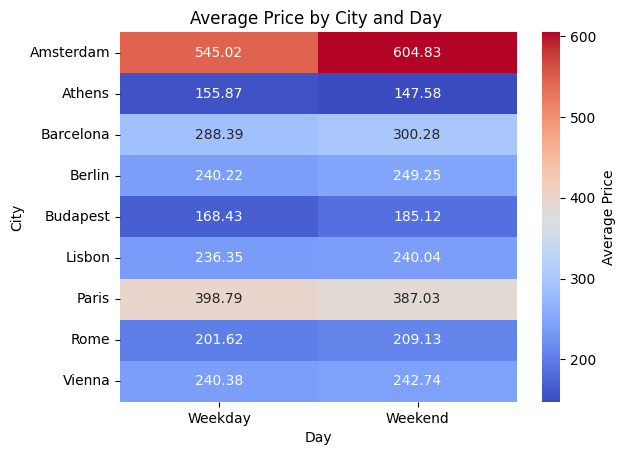

In [9]:

df= pd.read_csv('pandaspractice.csv.csv')
df=df.groupby(['City','Day'])['Price'].mean().reset_index()
df

df_pivot = df.pivot(index='City', columns='Day', values='Price')


sns.heatmap(df_pivot, cmap='coolwarm', annot=True, fmt='.2f', cbar_kws={'label': 'Average Price'})
plt.title('Average Price by City and Day ')
plt.show()
